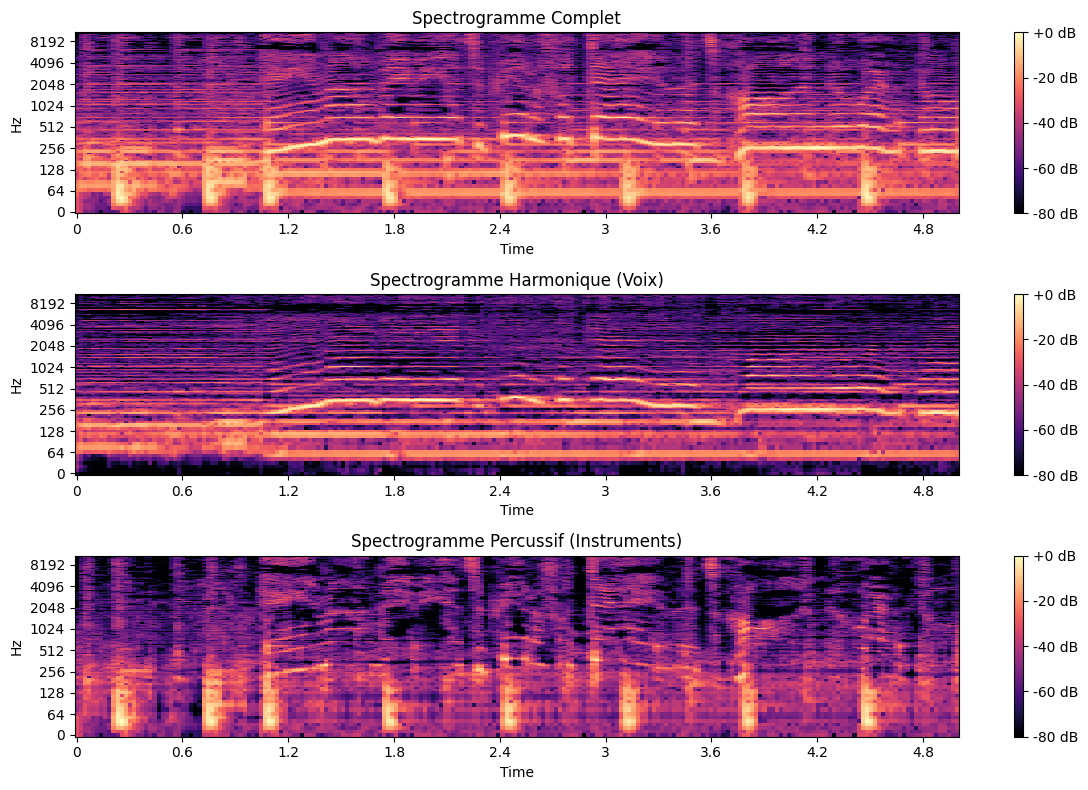

Lecture de la partie harmonique (Voix)


Expression 'paInvalidSampleRate' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2043
Expression 'PaAlsaStreamComponent_InitialConfigure( &self->playback, outParams, self->primeBuffers, hwParamsPlayback, &realSr )' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2716
Expression 'PaAlsaStream_Configure( stream, inputParameters, outputParameters, sampleRate, framesPerBuffer, &inputLatency, &outputLatency, &hostBufferSizeMode )' failed in 'src/hostapi/alsa/pa_linux_alsa.c', line: 2837


PortAudioError: Error opening OutputStream: Invalid sample rate [PaErrorCode -9997]

In [3]:
import librosa
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from librosa import display

# Charge le fichier audio
y, sr = librosa.load('téléchargement (2).wav', duration=10)

# Calcule la STFT
S_full, phase = librosa.magphase(librosa.stft(y))

# Calcule les masques pour séparer les composantes harmoniques et percussives
S_harmonic, S_percussive = librosa.decompose.hpss(S_full)

# Reconstruit les signaux séparés
y_harmonic = librosa.istft(S_harmonic * phase)
y_percussive = librosa.istft(S_percussive * phase)

# Affiche les spectrogrammes
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogramme Complet')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_harmonic, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogramme Harmonique (Voix)')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_percussive, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.title('Spectrogramme Percussif (Instruments)')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Joue la partie harmonique (Voix)
print("Lecture de la partie harmonique (Voix)")
sd.play(y_harmonic, sr)
sd.wait()

# Joue la partie percussive (Instruments)
print("Lecture de la partie percussive (Instruments)")
sd.play(y_percussive, sr)
sd.wait()